
# <font color="#001861"> **Project Title:** </font> **Portugal Hotel Booking Trends and Analysis**

**Contributors:** Ananya Anand,  Khushi Khushi, Lorelei Liu, Olimpia Borgohain, Parita Patel, Priyanka Chaudhari

## **Problem Definition:**
To evaluate the changing trends in hotel booking, we are analyzing the hotel booking data from 2015 to 2017 in Portugal, and will be addressing:
- Customer Behavior Pattern
- High/Low season for hotel demand
- Countries sent most tourists, associated with tourists types


## **Data Source:**
- Nuno Antonio, Ana Almeida, and Luis Nunes: https://www.sciencedirect.com/science/article/pii/S2352340918315191#bib6
- Kaggle Download Link: https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand?select=hotel_bookings.csv


## **Introduction & Motivation:** <br>
By studying the trends in the hospitality industry, we can understand the underlying factors affecting the demand of hotels, therefore identifying the most cost-efficient season to book a hotel as broke college students. On top of that, understanding the industry and customer behavior patterns will expose us to real-world marketing analytics.

## **Report Summary:** <br>
This notebook provides a concise analysis of hotel booking cancellations in Portugal from 2015 to 2017, focusing on two key areas: <br>
1) understanding the factors behind hotel booking cancellations, and <br>
2) exploring patterns in family travel bookings.<br>

In the section on hotel booking cancellations, we investigate various dimensions, including the types of hotels with the most cancellations, the year with the highest cancellations and no-shows, the distribution channels responsible for most cancellations, and the deposit types linked to elevated cancellation rates. In the family booking pattern analysis, we delve into monthly trends in family reservations, the outcomes of family bookings, special room type requests, and the meal preferences of families.

## **Data Dictionary:**

| Variable    | Type                                    | Description  |
|----------------|----------------------------------------|------------|
| ADR            | 	Numeric                    | Average Daily Rate    |
| Adults	       |Integer	                     |Number of adults        
| Agent          |	Categorical	               |ID of the travel agency that made the booking |
|ArrivalDateDayOfMonth	|Integer	|Day of the month of the arrival date|
|ArrivalDateMonth|Categorical                  |Month of arrival date with 12 categories: “January” to “December” |
|ArrivalDateWeekNumber|Integer	               |Week number of the arrival date|
|ArrivalDateYear	|Integer	                   |Year of arrival date	  |
|AssignedRoomType	|Categorical	               |Code for the type of room assigned to the booking.|
|                 |                            |Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons|
|                 |                            |(e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons |
|Babies	          |Integer	                   |Number of babies         |
|BookingChanges	  |Integer	                   |Number of changes/amendments made to the booking from the moment the booking was entered on |
|                 |                            |the PMS until the moment of check-in or cancellation|
|Children	        |Integer	                   |Number of children      |
|Company	        |Categorical	               |ID of the company/entity that made the booking or responsible for paying the booking.
|                 |                            | ID is presented instead of designation for anonymity reasons|
|Country	        |Categorical                  |Country of origin. Categories are represented in the ISO 3155-3:2013 format|
|CustomerType	   |Categorical	                  |Type of booking, assuming one of four categories|
|                 |                             |Contract - when the booking has an allotment or other type of contract associated to it;|
|                 |                             |Group - when the booking is associated to a group;|
|                 |                             |Transient - when the booking is not part of a group or contract, and is not associated to other transient booking;|
|                 |                             |Transient-party - when the booking is transient, but is associated to at least other transient booking|
|DaysInWaitingList	|Integer                   |Number of days the booking was in the waiting list before it was confirmed to the customer|
|DepositType      |Categorical	               |Indication on if the customer made a deposit to guarantee the booking.|
|                 |                            |This variable can assume three categories:|
|                 |                            |No Deposit - no deposit was made;|
|                 |                            |Non Refund - a deposit was made in the value of the total stay cost|
|                 |                            |Refundable  a deposit was made with a value under the total cost of stay.|
|DistributionChannel	|Categorical	           |Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”|
|IsCanceled	      |Categorical                 |Value indicating if the booking was canceled (1) or not (0)|
|IsRepeatedGuest	|Categorical	               |Value indicating if the booking name was from a repeated guest (1) or not (0)|
|LeadTime	        |Integer	                   |Number of days that elapsed between the entering date of the booking into the PMS and the arrival date|
|MarketSegment	  |Categorical	               |Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”	|
|Meal       	    |Categorical	               |Type of meal booked. Categories are presented in standard hospitality meal packages:|
|                 |                            |Undefined/SC  - no meal package;|
|                 |                            |BB - Bed & Breakfast;|
|                 |                            |HB  Half board (breakfast and one other meal - usually dinner);|
|                 |                            |FB - Full board (breakfast, lunch and dinner)|
|PreviousBookingsNotCanceled	|Integer	       |Number of previous bookings not cancelled by the customer prior to the current booking|
|PreviousCancellations	|Integer	             |Number of previous bookings that were cancelled by the customer prior to the current booking|
|RequiredCardParkingSpaces	|Integer	         |Number of car parking spaces required by the customer	 |
|ReservationStatus	       |Categorical	       |Reservation last status, assuming one of three categories:|
|                         |                    |Canceled - booking was canceled by the customer;|
|                         |                    |Check-Out - customer has checked in but already departed;|
|                         |                    |No-Show - customer did not check-in and did inform the hotel of the reason why|
|ReservationStatusDate	  |Date	               |Date at which the last status was set. |
|                         |                    |This variable can be used in conjunction with the ReservationStatus to understand when|
|                         |                    | was the booking canceled or when did the customer checked-out of the hotel|
|ReservedRoomType	        | Categorical	       |Code of room type reserved. Code is presented instead of designation for anonymity reasons|
|StaysInWeekendNights	    |Integer	           |Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel|
|StaysInWeekNights	      |Integer	           |Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel|
|TotalOfSpecialRequests	  |Integer	           |Number of special requests made by the customer (e.g. twin bed or high floor)|



### **Importing The Necessary Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import missingno as msno
import statistics as stats
import plotly.express as px

### **Loading the dataset**

In [ ]:
url = "https://raw.githubusercontent.com/Parita2442/Hotel-bookings-G06/main/hotel_bookings.csv"
bookings = pd.read_csv(url)

In [ ]:
# to check the shape of the dataset
bookings.shape

(119390, 32)

We can see that the dataset consists of 119390 rows and 2 columns. <br>
Now, let's see the first five rows of our dataset

In [ ]:
bookings.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
bookings.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

From the above cell, we noticed that:
1. The columns children, agent, country, and company has missing values.
2. Most of the columns are not of their respective datatype they should be.
 <br><br>
 So, now we will start with the data cleaning and transformation phase.

## **Data Cleaning and Transformation:**

1. The graph below displays the missing values in the dataset. The missing values of all the columns are visualized.

<Axes: >

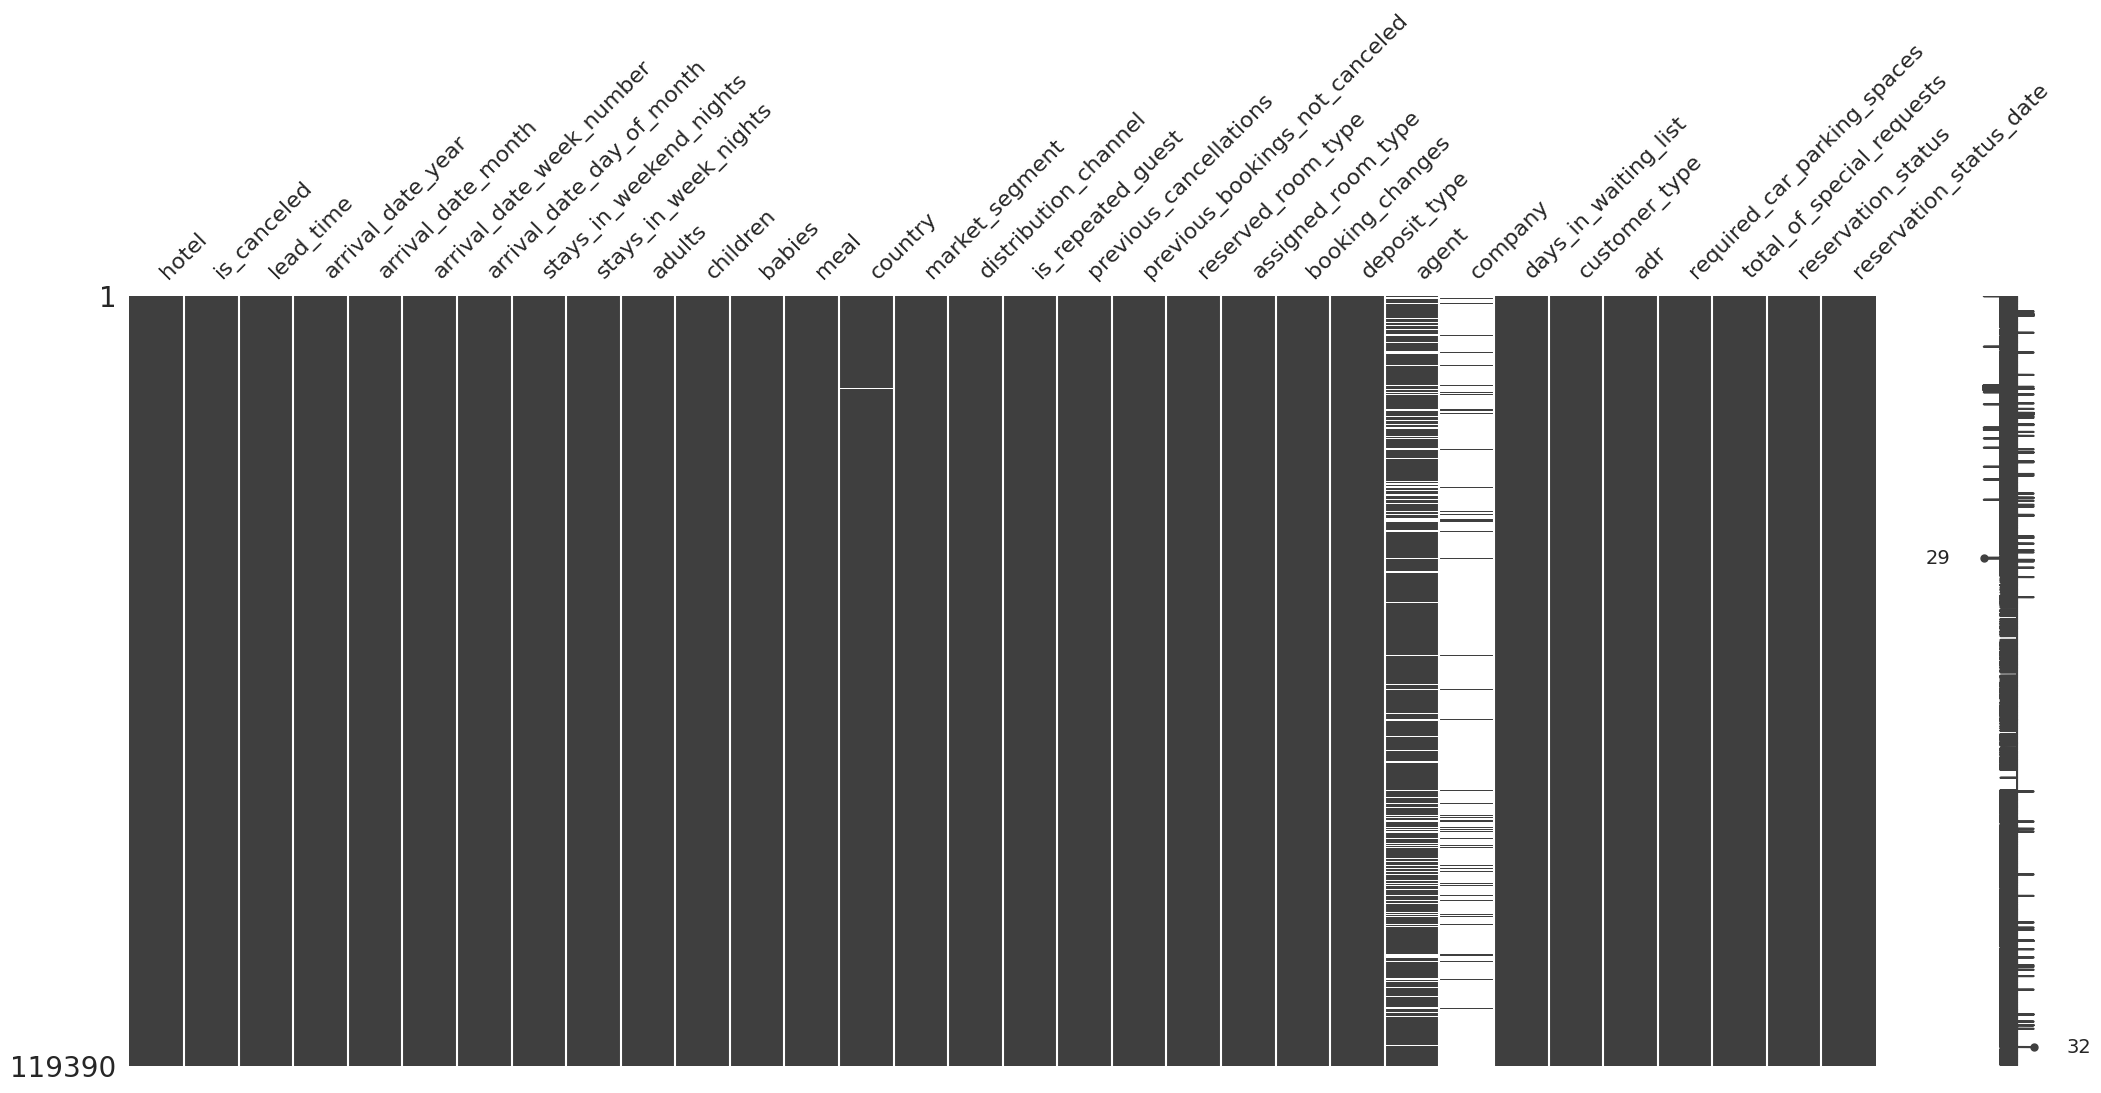

In [ ]:
# visualising missing values in the dataframe
msno.matrix(bookings)

# citation - https://www.geeksforgeeks.org/python-visualize-missing-values-nan-values-using-missingno-library/

In [ ]:
# checking for null values
bookings.isnull().mean()*100

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

In [ ]:
print("Missing values in children column: ",bookings.children.isna().sum())
print("Missing values in country column: ",bookings.country.isna().sum())
print("Missing values in agent column: ",bookings.agent.isna().sum())
print("Missing values in company column: ",bookings.company.isna().sum())

Missing values in children column:  4
Missing values in country column:  488
Missing values in agent column:  16340
Missing values in company column:  112593


So, we calcuated the total missing values of each of the column.<br>
Now, let us fill up these missing values.<br>
We are making these assumptions to fill up the missing values:
1. Missing value in children means that no children were present so, we will assign it with a value of 0
2. For missing values in case of agent, we will assume that the customer did not take agents to book their hotel, so we will be assigning it a value of 777.
3. For missing values in case of company, we will assume that the companies did not sponser the trip, so we will assign it a value of 999.

### Filling in the rows with missing value

In [ ]:
#checking if label 777 is in the agent column
bookings.agent[bookings.agent==777]

Series([], Name: agent, dtype: float64)

In [ ]:
#checking if label 999 is in the company column
bookings.company[bookings.company==999]

Series([], Name: company, dtype: float64)

In [ ]:
bookings.children.fillna(0,inplace=True) # filling the missing values of children with 0
bookings.company.fillna(999,inplace=True) #filling the missing value with 999( for no company sponsorship)
bookings.agent.fillna(777,inplace=True) #filling the missing value with 777 (for any null values)
bookings.meal.replace({'Undefined':'SC'},inplace=True)
bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

We are done with replacing the missing values for agent, company and children.
But we realized that there is one row which has a negative adr. So we will delete that row as adr cannot be negative.

In [ ]:
bookings[bookings.adr <0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
14969,Resort Hotel,0,195,2017,March,10,5,4,6,2,...,No Deposit,273.0,999.0,0,Transient-Party,-6.38,0,0,Check-Out,2017-03-15


In [ ]:
# removing any negative values for adr (1 in this dataset)
cleaned_bookings = bookings[bookings["adr"]>=0]

Now, we will convert the reservation_status_date column to date format as it was previously of string(object) datatype.


In [ ]:
# converting the reservation_status_date column from object type to datetime type
cleaned_bookings['reservation_status_date']= pd.to_datetime(cleaned_bookings['reservation_status_date'])

<ipython-input-91-e1aa99fe3050>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# check for reservation_status_date data type
cleaned_bookings.reservation_status_date.dtype

dtype('<M8[ns]')

Our dataset has the arrival date, month, year in separate columns. So, lets bring it into one column.<br>
First of all let's convert it into string datatype, concatenate it and then change it into date format.

In [ ]:
# merging the dates
cleaned_bookings['arrival_date'] = cleaned_bookings['arrival_date_year'].astype('str') + cleaned_bookings['arrival_date_month'].astype('str') + cleaned_bookings['arrival_date_day_of_month'].astype('str')
cleaned_bookings['arrival_date']

<ipython-input-93-be21c4046816>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0            2015July1
1            2015July1
2            2015July1
3            2015July1
4            2015July1
              ...     
119385    2017August30
119386    2017August31
119387    2017August31
119388    2017August31
119389    2017August29
Name: arrival_date, Length: 119389, dtype: object

In [ ]:
# converting it to a date type
date_format = "%Y%B%d"  # This format matches "2015July01"

# Convert the string column to datetime
cleaned_bookings['arrival_date'] = pd.to_datetime(cleaned_bookings['arrival_date'], format=date_format)

<ipython-input-94-4f58f31589e9>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
cleaned_bookings.arrival_date.dtype

dtype('<M8[ns]')

Now, let's check for the country column.

In [ ]:
# checking for missing values in the country column
cleaned_bookings[cleaned_bookings.country.isna()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
30,Resort Hotel,0,118,2015,July,27,1,4,10,1,...,777.0,999.0,0,Transient,62.0,0,2,Check-Out,2015-07-15,2015-07-01
4127,Resort Hotel,1,0,2016,February,8,15,0,0,0,...,777.0,383.0,0,Transient,0.0,0,0,Canceled,2016-02-15,2016-02-15
7092,Resort Hotel,1,8,2016,July,30,21,0,1,1,...,777.0,204.0,0,Transient,73.0,0,2,Canceled,2016-07-20,2016-07-21
7860,Resort Hotel,1,39,2016,August,36,30,0,5,2,...,777.0,999.0,0,Transient,159.0,0,5,Canceled,2016-07-22,2016-08-30
8779,Resort Hotel,1,0,2016,October,42,13,0,1,1,...,777.0,457.0,0,Transient,50.0,0,0,Canceled,2016-10-13,2016-10-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65908,City Hotel,1,0,2017,April,15,10,0,0,0,...,777.0,279.0,0,Transient,0.0,0,0,Canceled,2017-04-10,2017-04-10
65909,City Hotel,1,0,2017,April,15,10,0,0,0,...,777.0,279.0,0,Transient,0.0,0,0,Canceled,2017-04-10,2017-04-10
65910,City Hotel,1,0,2017,April,15,10,0,0,0,...,777.0,279.0,0,Transient,0.0,0,0,Canceled,2017-04-10,2017-04-10
80830,City Hotel,0,4,2015,November,48,23,1,2,1,...,37.0,999.0,0,Transient-Party,70.0,0,0,Check-Out,2015-11-26,2015-11-23


Since, the country has 488 missing rows we have decided to drop those data points only when we will be analyzing country-wise data.

Now that we have dealt with the missing values, we will check for the data types and change if it is required.

In [ ]:
cleaned_bookings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119389 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119389 non-null  object        
 1   is_canceled                     119389 non-null  int64         
 2   lead_time                       119389 non-null  int64         
 3   arrival_date_year               119389 non-null  int64         
 4   arrival_date_month              119389 non-null  object        
 5   arrival_date_week_number        119389 non-null  int64         
 6   arrival_date_day_of_month       119389 non-null  int64         
 7   stays_in_weekend_nights         119389 non-null  int64         
 8   stays_in_week_nights            119389 non-null  int64         
 9   adults                          119389 non-null  int64         
 10  children                        119389 non-null  float64

In [ ]:
# changing the columns types
cleaned_bookings = cleaned_bookings.astype({"hotel":"category","is_canceled":"category","arrival_date_year":int,"arrival_date_month":str,
                                            "arrival_date_day_of_month":int,"children":int,"meal":"category","market_segment":"category",
                                            "distribution_channel":"category","is_repeated_guest":"category", "reserved_room_type":
                                            "category","assigned_room_type":"category","deposit_type":"category","agent":"category","company":"category",
                                            "customer_type":"category","reservation_status":"category"})
cleaned_bookings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119389 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119389 non-null  category      
 1   is_canceled                     119389 non-null  category      
 2   lead_time                       119389 non-null  int64         
 3   arrival_date_year               119389 non-null  int64         
 4   arrival_date_month              119389 non-null  object        
 5   arrival_date_week_number        119389 non-null  int64         
 6   arrival_date_day_of_month       119389 non-null  int64         
 7   stays_in_weekend_nights         119389 non-null  int64         
 8   stays_in_week_nights            119389 non-null  int64         
 9   adults                          119389 non-null  int64         
 10  children                        119389 non-null  int64  

Dropping the missing country rows to form a new dataframe to use country wise analysis

In [ ]:
# dropping all NA values for the country column
cleaned_country = cleaned_bookings.dropna(subset="country")

In [ ]:
#final cleaned dataset
cleaned_bookings

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,777.0,999.0,0,Transient,0.00,0,0,Check-Out,2015-07-01,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,777.0,999.0,0,Transient,0.00,0,0,Check-Out,2015-07-01,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,777.0,999.0,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07-01
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.0,999.0,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07-01
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,999.0,0,Transient,98.00,0,1,Check-Out,2015-07-03,2015-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,394.0,999.0,0,Transient,96.14,0,0,Check-Out,2017-09-06,2017-08-30
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,9.0,999.0,0,Transient,225.43,0,2,Check-Out,2017-09-07,2017-08-31
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,9.0,999.0,0,Transient,157.71,0,4,Check-Out,2017-09-07,2017-08-31
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,89.0,999.0,0,Transient,104.40,0,0,Check-Out,2017-09-07,2017-08-31


In [ ]:
#final cleaned dataset - with cleaned country column
cleaned_country

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,777.0,999.0,0,Transient,0.00,0,0,Check-Out,2015-07-01,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,777.0,999.0,0,Transient,0.00,0,0,Check-Out,2015-07-01,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,777.0,999.0,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07-01
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.0,999.0,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07-01
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,999.0,0,Transient,98.00,0,1,Check-Out,2015-07-03,2015-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,394.0,999.0,0,Transient,96.14,0,0,Check-Out,2017-09-06,2017-08-30
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,9.0,999.0,0,Transient,225.43,0,2,Check-Out,2017-09-07,2017-08-31
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,9.0,999.0,0,Transient,157.71,0,4,Check-Out,2017-09-07,2017-08-31
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,89.0,999.0,0,Transient,104.40,0,0,Check-Out,2017-09-07,2017-08-31



Now that we have a cleaned dataset, we will further dig deeper into gaining insights by visualizing and understanding the dataset.


### Month Ordering and Mapping for Better Axis Visualization



In [ ]:
month_order = ["January","February","March","April","May","June","July","August","September","October","November","December"]
cleaned_bookings.arrival_date_month = pd.Categorical(cleaned_bookings.arrival_date_month,
                      categories=month_order,
                      ordered=True)

In [ ]:
month_mapping = {
    'January': 'Jan',
    'February': 'Feb',
    'March': 'Mar',
    'April': 'Apr',
    'June':'Jun',
    'July':'Jul',
    'August':'Aug',
    'September':'Sep',
    'October':'Oct',
    'November':'Nov',
    'December':'Dec'
}
cleaned_bookings['arrival_date_month'] = cleaned_bookings['arrival_date_month'].replace(month_mapping)
cleaned_country['arrival_date_month'] = cleaned_country['arrival_date_month'].replace(month_mapping)

<ipython-input-103-41fa6b1688dc>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<ipython-input-104-d32bd47fad1d>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



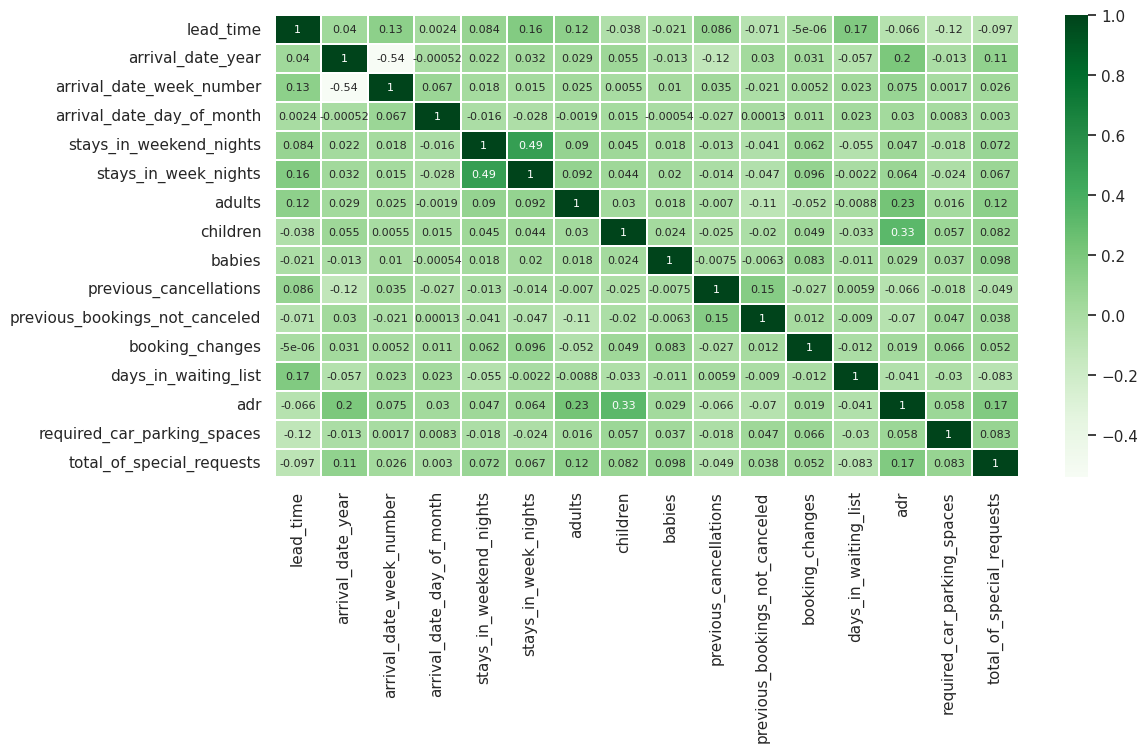

In [ ]:
plt.figure(figsize=(12, 6))
corr = cleaned_country.corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
                 linewidths=.2, cmap="Greens",annot=True, annot_kws={'size': 8});

The above visualization is a heatmap with the correlation with Month Ordering for better axis display.

## **Exploring Monthly Travelling Trends**

We explored 'arrival_date_month,' reflecting the actual travel months, to uncover noteworthy seasonal patterns within the sampled years, shedding light on the ebb and flow of hotel bookings throughout the year.

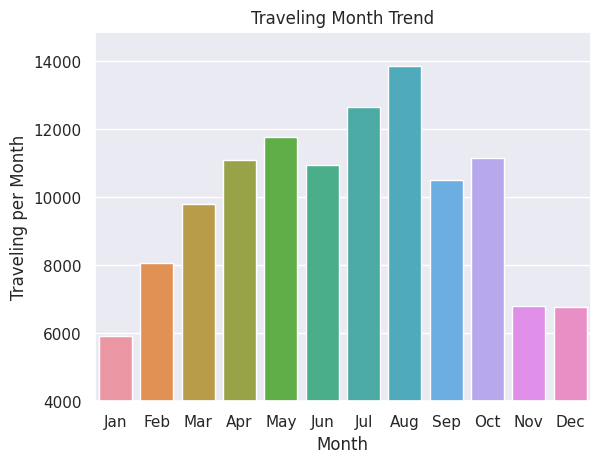

In [ ]:
#Monthly Travelling Trends (based on arrivals every month)
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

month_counts = cleaned_bookings['arrival_date_month'].value_counts()

sns.barplot(x=month_counts.index, y=month_counts, order=month_order)
plt.ylim(4000, max(month_counts)+1000) #make the trend more visible
plt.xlabel('Month')
plt.ylabel('Traveling per Month')
plt.title('Traveling Month Trend');

Over the sampled period spanning from late 2014 to 2017, it's evident that travel interest exhibited an upward trajectory from February through May, briefly pausing in June (although still relatively popular compared to true off-peak periods), followed by a surge in July and August. The decline commenced in September, gradually transitioning into the winter low season, covering the months of November through January.

Drawing inspiration from these trends, we delved deeper by examining the top 5 countries that contributed the most tourists based on their monthly visit patterns.

Although following the general traveling trend we observed before, Portugal is on fire all year round compared to the rest countries - no wonder, since Portugal is the home country of this dataset. We then filtered out Portugal for more insights into 2nd-popular to 5th-popular countries.

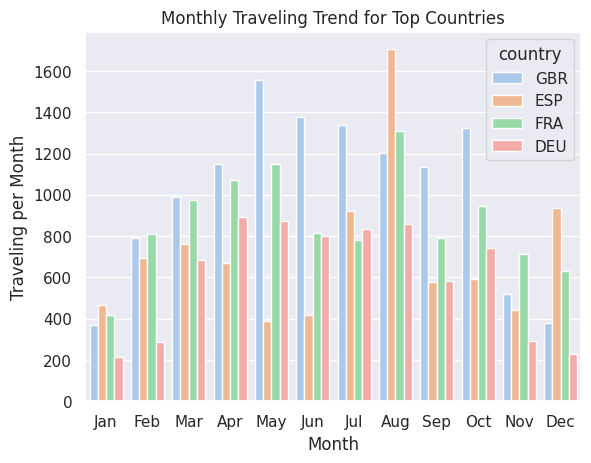

In [ ]:
#Monthly Traveling Trends for top 2-5 tourist-provided countries from 2015 - 2017
T_on_country = cleaned_country['country'].value_counts().sort_values(ascending=False)
h5 = T_on_country.index[1:5].tolist() #GPT helped on convert series to list
h5_t_on_country = cleaned_country[cleaned_country['country'].isin(h5)]

uniformed_color = sns.color_palette('pastel')
sns.countplot(x='arrival_date_month', hue='country', data=h5_t_on_country, order=month_order, palette=uniformed_color)
plt.xlabel('Month')
plt.ylabel('Traveling per Month')
plt.title('Monthly Traveling Trend for Top Countries');

Surprisingly, we uncovered nuanced variations within the overarching travel trend. The United Kingdom stood out, sending the most tourists in May, maintaining robust visitation levels from June to October, experiencing a sharp drop in winter, and rekindling in spring. Spain, in contrast, displayed a singular surge in August, while French tourists favored travel during both spring and August, tapering off in winter. German tourists exhibited an extended travel season, embracing exploration from early summer through late fall. Although these countries partially aligned with the broader trend, their distinctive travel patterns call for more intricate observations and insights.

Now, we move forward to understand the trends of Hotel booking cancellations

## **Exploring hotel booking cancellation**

In [ ]:
# checking for unique values of hotel column
bookings['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

We can see that there are two types of hotels:
1. Resort Hotel
2. City Hotel <br>
Now, let's see the distibution of these two hotel types

In [ ]:
# splitting the resort and city hotel type
resort = cleaned_bookings[cleaned_bookings.hotel == 'Resort Hotel']
city = cleaned_bookings[cleaned_bookings.hotel == 'City Hotel']

In [ ]:
# checking the unique values of is_canceled column( It should be 1 and 0, but doing  a sanity check)
cleaned_bookings['is_canceled'].unique()

[0, 1]
Categories (2, int64): [0, 1]

In [ ]:
cleaned_bookings.reservation_status.unique()

['Check-Out', 'Canceled', 'No-Show']
Categories (3, object): ['Canceled', 'Check-Out', 'No-Show']

So, we verified the unique values of is_canceled column where:
* 0 : not canceled
* 1 : canceled
<br> <br>
Now we will explore the data for the canceled bookings

In [ ]:
# for city hotel
city_hotel__cancellation = city['is_canceled'].value_counts(normalize = True)
city_hotel__cancellation

0    0.58273
1    0.41727
Name: is_canceled, dtype: float64

We saw that for city hotels, 58.27% are not cancelled but 41.73% are being canceled.
<br>
Let's check it for resort hotel as well;

In [ ]:
# for resort hotel
resort_hotel__cancellation = resort['is_canceled'].value_counts(normalize = True)
resort_hotel__cancellation

0    0.72236
1    0.27764
Name: is_canceled, dtype: float64

In case of resort hotel, 27.64% was canceled.<br>
Lets now check the cancellation ratio for the entire cleaned hotel booking dataset.

In [ ]:
# for all hotel types cancellation rate
hotel__cancellation = cleaned_bookings['is_canceled'].value_counts(normalize = True)
hotel__cancellation

0    0.629581
1    0.370419
Name: is_canceled, dtype: float64

So, **37.04%** of hotel bookings got canceled.<br>


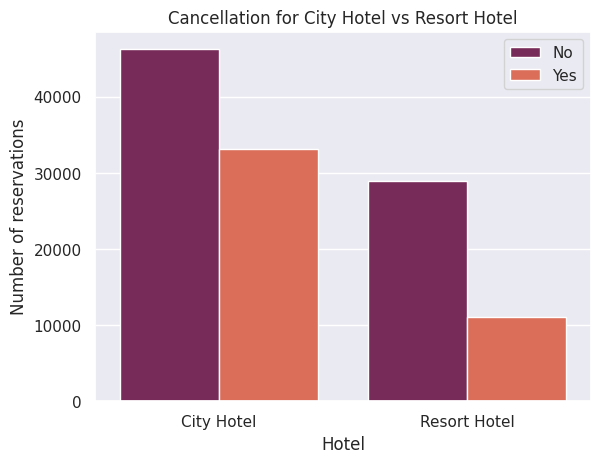

In [ ]:
#Visualizing the cancellations according to the Hotels
sns.countplot(data = cleaned_bookings, x = 'hotel',hue = 'is_canceled', palette= 'rocket')
plt.title('Cancellation for City Hotel vs Resort Hotel')
plt.xlabel('Hotel')
plt.ylabel('Number of reservations')
plt.legend(["No",'Yes']);

Examining the graph, it's evident that city hotels experience a higher rate of cancellations in comparison to resort hotels. This observation aligns with the idea that city hotels tend to have a higher booking volume when contrasted with resort hotels. The elevated cancellation rate in city hotels may be influenced by factors such as business-related travel, last-minute changes in plans, or shorter stays, which can contribute to a more dynamic and cancellation-prone booking environment. Conversely, resort hotels, often associated with leisure and vacation stays, may exhibit a lower cancellation rate due to guests typically planning and committing to their trips well in advance. These insights shed light on the distinct dynamics between hotel types and their associated cancellation patterns.

In [ ]:
city.shape

(79330, 33)

In [ ]:
city.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
40060,City Hotel,0,6,2015,Jul,27,1,0,2,1,...,6.0,999.0,0,Transient,0.0,0,0,Check-Out,2015-07-03,2015-07-01
40061,City Hotel,1,88,2015,Jul,27,1,0,4,2,...,9.0,999.0,0,Transient,76.5,0,1,Canceled,2015-07-01,2015-07-01
40062,City Hotel,1,65,2015,Jul,27,1,0,4,1,...,9.0,999.0,0,Transient,68.0,0,1,Canceled,2015-04-30,2015-07-01
40063,City Hotel,1,92,2015,Jul,27,1,2,4,2,...,9.0,999.0,0,Transient,76.5,0,2,Canceled,2015-06-23,2015-07-01
40064,City Hotel,1,100,2015,Jul,27,2,0,2,2,...,9.0,999.0,0,Transient,76.5,0,1,Canceled,2015-04-02,2015-07-02


In [ ]:
# sanity check
city[(city.is_canceled == 0) & (city.reservation_status == 'Canceled')]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date


Checking out the DaysInWaitingList column.

In [ ]:
city.days_in_waiting_list.unique()

array([  0,  38,  48,  65,  33,  77,  21,  80,  59,  40,  58,  89,  53,
        50,  49,  60,  69,  87,  91,  57,  99, 111,  79,  98,  85,  63,
        15,   3,  20,  93, 101,   4,  41,  34, 224,  31,  39,  56, 187,
       176,  71,  55,  96, 236, 259, 207, 215, 160,  75, 120,  30,  32,
        27,  62,  24, 108,   1, 147,   5,  14, 107, 379,  70,   8,  35,
       178, 330, 223, 174, 162, 391,  68,  11, 193,  10,  76,  16,  22,
        28,   9, 165,   2,  44,  17,  43, 100,  25,  46,   7, 113,  18,
        47,  84, 175, 183,  23,  13, 117,  12,  54,  26,  73,  45,   6,
        19,  42,  72,  61,  81,  92,  74, 167,  83, 105,  36])

In [ ]:
print("Max waiting period: ", city.days_in_waiting_list.max())
print("Min waiting period: ",city.days_in_waiting_list.min())
print("Average waiting period: ",round(city.days_in_waiting_list.mean(),2))

Max waiting period:  391
Min waiting period:  0
Average waiting period:  3.23


We can see that the maximun waiting list is 391 where as lowest is 0. <br>



In [ ]:
#Focusing on a small section of the dataset, i.e, the canceled city hotel booking
city_canceled = city[city['is_canceled'] == 1]
city_canceled.shape

(33102, 33)

We can identify that 33102 rows of data are present that signifies that 33102 city hotels bookings have been canceled from 2015 to 2017.





# SECTION 1 : **UNDERSTANDING CANCELLATIONS**
To begin our analysis, we focus on understanding the dynamics of booking cancellations within the hotel industry. Our key objectives include:

1. **Monthly Cancellation Trends vs. Distribution Channels**

We begin our exploration by analyzing monthly cancellation trends. We create the groundwork for learning about the fluctuations in cancellations across the sampled years by comprehending how they change over time.  We also investigate how different distribution channels influence cancellation rates. Does the method of booking impact cancellation behavior?

2. **Cancellation vs. No-Show by Year**

Our journey through the years 2015 to 2017 reveals how cancellations and no-shows evolve over time. By examining annual data, we aim to identify trends and anomalies, shedding light on the changing dynamics of hotel bookings.

3. **Country-wise Cancellation: Resort vs. City Hotels**

We delve into the intriguing aspect of cancellations based on the countries of origin. By scrutinizing which countries exhibit the highest cancellation rates for both resort and city hotels, we gain insights into international booking behavior.

4. **Lead Time Analysis**

We investigate how the lead time (the number of days between booking and arrival) influences cancellation rates. Are last-minute bookings more likely to be canceled?


5. **The Deposit Type Dilemma**

Our final destination in this journey takes us to the vexing question of deposit types and their impact on cancellation decisions. We delve into how refundable and non-refundable deposits affect cancellations, seeking to decipher the complex relationship between deposit choices and booking behavior.


###**Overview of Cancellation from 2014 to 2017**

In [ ]:
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource, CustomJS, DatetimeTickFormatter, DateRangeSlider
from bokeh.io import output_notebook
from bokeh.layouts import layout
from datetime import datetime

In [ ]:
grand_cancellation = cleaned_bookings[cleaned_bookings['is_canceled'] == 1]
date_cancellation = np.sort(grand_cancellation['reservation_status_date'].unique())[::1]
daily_cancellation = grand_cancellation.groupby('reservation_status_date')['is_canceled'].size()

In [ ]:
earliest = grand_cancellation['reservation_status_date'].min()
latest = grand_cancellation['reservation_status_date'].max()
earliest_timestamp = datetime.timestamp(earliest) *1000
latest_timestamp = datetime.timestamp(latest) *1000

In [ ]:
#Huge credit to ChatGPT and Datacamp for having examples for us to fill in the blank
#This graph consists of 50% ChatGPT debuging, 25% Datacamp Exampling and 25% us filling in blanks

output_notebook()

cancellation_plot = {'date': date_cancellation,
                     'counts': daily_cancellation.tolist()}

output_file("Cancel Overview.html")
source = ColumnDataSource(cancellation_plot)
can = figure(title="Cancellation from 2014 - 2017", x_axis_label='Date', y_axis_label='Cancellation Counts')
can.line('date', 'counts', source=source)

slider = DateRangeSlider(start=earliest_timestamp, end=latest_timestamp, value=(earliest_timestamp, latest_timestamp), step=1, title="Date Range")
callback = CustomJS(args=dict(x_range=can.x_range, slider=slider), code="""
    x_range.start = slider.value[0];
    x_range.end = slider.value[1];
""")

slider.js_on_change('value', callback)
can.xaxis.formatter = DatetimeTickFormatter()

cancellation_overview = layout([[can], [slider]])

show(cancellation_overview)

Bokeh visualization offers a powerful tool for exploring and gaining insights into the temporal patterns of cancellations within the dataset. It supports decision-making processes and helps users better understand the dynamics of hotel booking cancellations.

### **1. Monthly Cancellation Trends vs. Distribution Channels**

We will observe and visualize what are the trends and patterns that emerge when examining monthly cancellations through various distribution channels.

In [ ]:
city.distribution_channel.unique()

['TA/TO', 'Direct', 'Undefined', 'Corporate', 'GDS']
Categories (5, object): ['Corporate', 'Direct', 'GDS', 'TA/TO', 'Undefined']

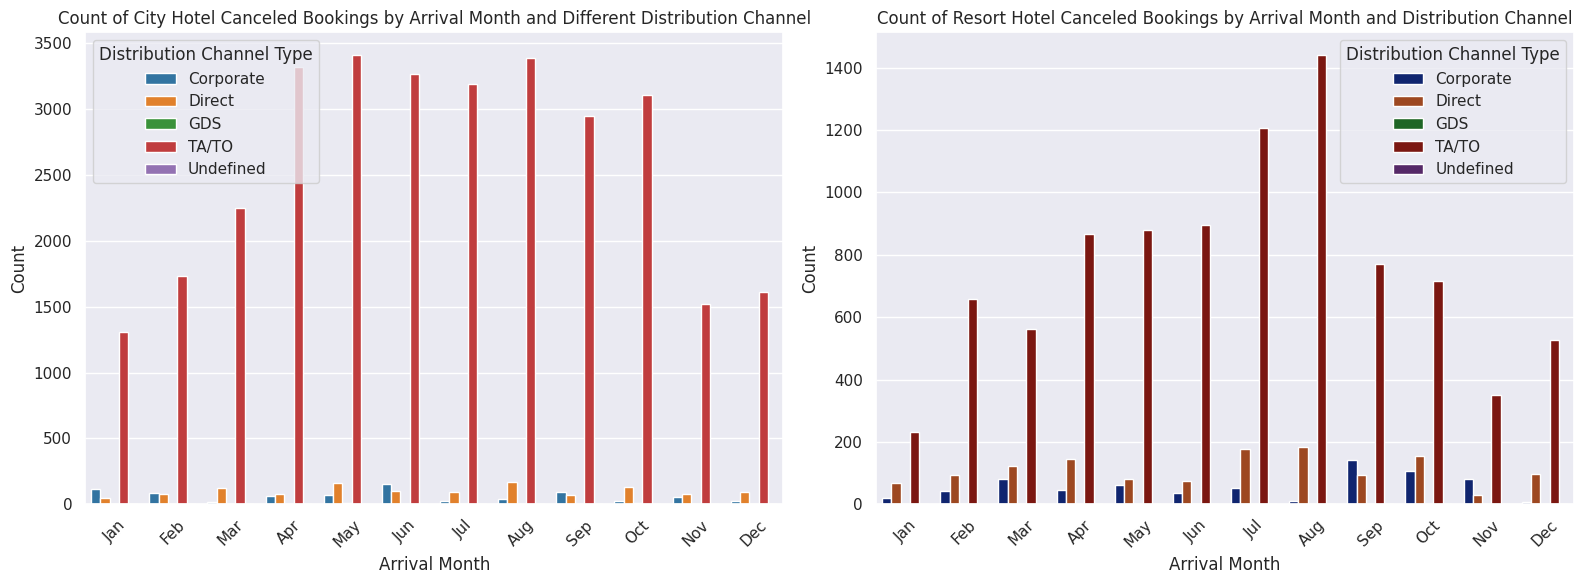

In [ ]:
resort_cancelled = resort[resort['is_canceled'] == 1 ]

# Creating subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
# Subplot 1 - City Hotel Canceled Bookings
sns.countplot(data=city_canceled, x='arrival_date_month', hue='distribution_channel', palette=sns.color_palette("tab10"), ax=axes[0])
axes[0].set_title('Count of City Hotel Canceled Bookings by Arrival Month and Different Distribution Channel')
axes[0].set_xlabel('Arrival Month')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(title='Distribution Channel Type', loc='best')
# Subplot 2 - Resort Hotel Canceled Bookings
sns.countplot(data=resort_cancelled, x='arrival_date_month', hue='distribution_channel', palette=sns.color_palette("dark"), ax=axes[1])
axes[1].set_title('Count of Resort Hotel Canceled Bookings by Arrival Month and Distribution Channel')
axes[1].set_xlabel('Arrival Month')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(title='Distribution Channel Type', loc='upper right')
plt.tight_layout()
plt.show()

In [ ]:
resort_cancelled.shape

(11122, 33)

When scrutinizing cancellations within the realm of city hotel bookings, one distribution channel, TA/TO (Travel Agents/Tour Operators), emerges as the primary player.

Notably, the months of May and August take center stage, displaying the highest numbers of cancellations, especially within the TA/TO distribution channel. Intriguingly, the undefined and GDS (Global Distribution System) distribution channels appear to have a less pronounced role in city hotel cancellations.

This data suggests a fascinating interplay between the booking source, time of year, and cancellation behavior, offering valuable insights into the dynamics of city hotel bookings and the preferences of travelers.

### **2. Cancellation vs No Shows by Year**

To visualize how the annual trends in cancellations compare to those of no-shows, we observe the insights that can be derived from these patterns to compare the cancellations and no shows in a year.

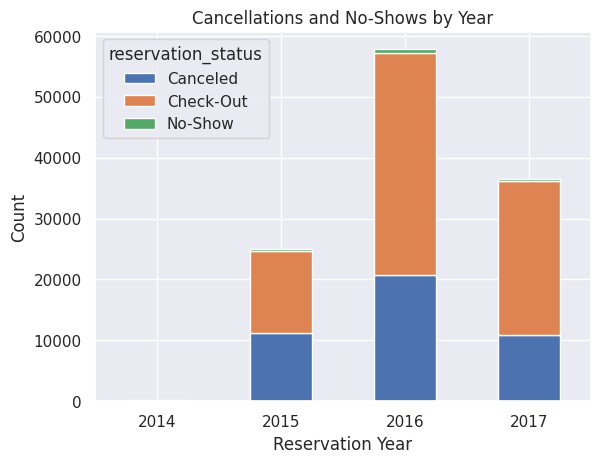

In [ ]:
# Extracting the year from the 'reservation_status_date' column
cleaned_bookings['reservation_year'] = pd.to_datetime(cleaned_bookings['reservation_status_date']).dt.year

# Grouping the data by year and reservation status and count the number of occurrences
cancellation_by_year = cleaned_bookings.groupby(['reservation_year', 'reservation_status']).size().unstack()
cancellation_by_year.plot(kind="bar",stacked=True)
plt.title('Cancellations and No-Shows by Year')
plt.xlabel('Reservation Year')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

The bar chart directly compares the counts of cancellations and no-shows side by side for each year. We can clearly observe that 2016 has the maximum cancellations and no-shows by comparing the bars for each status.

### **3. Maximum Cancellations: Resort vs. City Hotels**

In [ ]:
cleaned_bookings['ArrivingMonth'] = cleaned_bookings['arrival_date'].dt.month_name()
print(cleaned_bookings.ArrivingMonth.unique())
count_whole = cleaned_bookings['ArrivingMonth'].value_counts().sort_index()
print(count_whole)

['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
April        11089
August       13877
December      6780
February      8068
January       5929
July         12661
June         10939
March         9793
May          11791
November      6794
October      11160
September    10508
Name: ArrivingMonth, dtype: int64


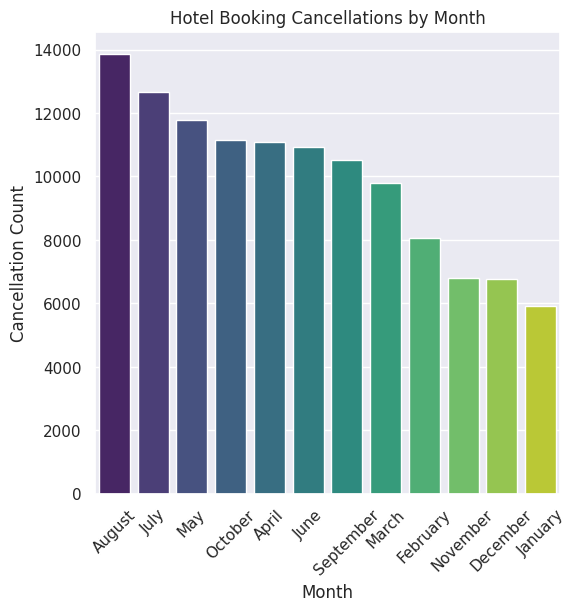

In [ ]:
count_whole = count_whole.sort_values(ascending=False)
# Create a bar plot
plt.figure(figsize=(6, 6))
sns.barplot(x=count_whole.index, y=count_whole.values, palette="viridis")

# Customize the plot
plt.title("Hotel Booking Cancellations by Month")
plt.xlabel("Month")
plt.ylabel("Cancellation Count")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [ ]:
city_canceled = city[city['is_canceled'] == 1]
city_canceled.shape

(33102, 33)

In [ ]:
resort_canceled = resort[resort['is_canceled'] == 1]
city_canceled.shape

(33102, 34)

In [ ]:
# checking the months with highest cancellation
city_canceled['ArrivingMonth'] = city_canceled['arrival_date'].dt.month_name()
print(city_canceled.ArrivingMonth.unique())
count = city_canceled['ArrivingMonth'].value_counts().sort_index()
print(count)

['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
April        3465
August       3602
December     1740
February     1901
January      1482
July         3306
June         3528
March        2386
May          3653
November     1661
October      3268
September    3110
Name: ArrivingMonth, dtype: int64


<ipython-input-130-b1afec4dd881>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# for resort cancelled
# checking the months with highest cancellation
resort_canceled['ArrivingMonth'] = resort_canceled['arrival_date'].dt.month_name()
print(resort_canceled.ArrivingMonth.unique())
resort_count = resort_canceled['ArrivingMonth'].value_counts().sort_index()

print(resort_count)

['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
April        1059
August       1637
December      631
February      795
January       325
July         1436
June         1007
March         763
May          1024
November      461
October       978
September    1006
Name: ArrivingMonth, dtype: int64


<ipython-input-160-a87f81acbb36>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



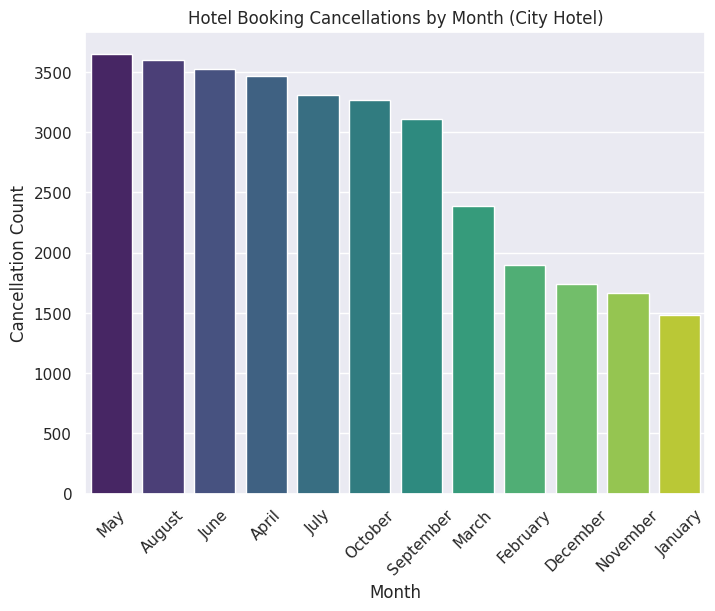

In [ ]:
# Sort the 'count' Series in descending order
count = count.sort_values(ascending=False)
# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=count.index, y=count.values, palette="viridis")

# Customize the plot
plt.title("Hotel Booking Cancellations by Month (City Hotel)")
plt.xlabel("Month")
plt.ylabel("Cancellation Count")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


* We noticed that the month of May had the highest cancellations.
* The month of January had the lowest cancellations.<br>
Now, to identify the month with the highest booking cancellation rate, we employ a visual analysis focused on the top 10 countries of origin, specifically those with the highest number of cancellations for city hotels.

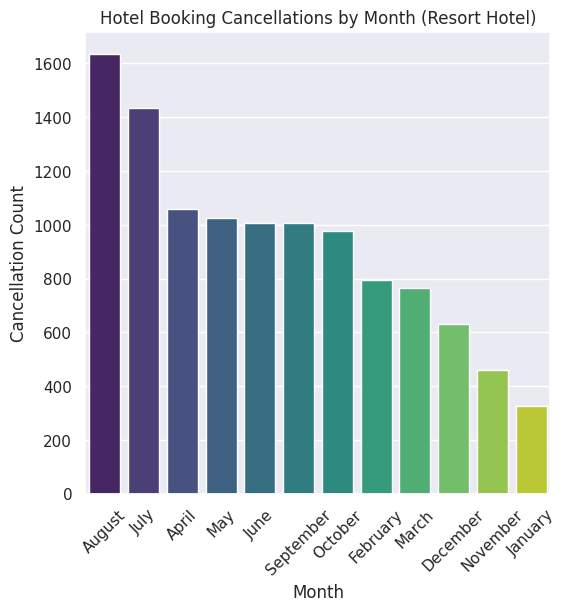

In [ ]:
# Sort the 'count' Series in descending order
resort_count = resort_count.sort_values(ascending=False)
# Create a bar plot
plt.figure(figsize=(6, 6))
sns.barplot(x=resort_count.index, y=resort_count.values, palette="viridis")

# Customize the plot
plt.title("Hotel Booking Cancellations by Month (Resort Hotel)")
plt.xlabel("Month")
plt.ylabel("Cancellation Count")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


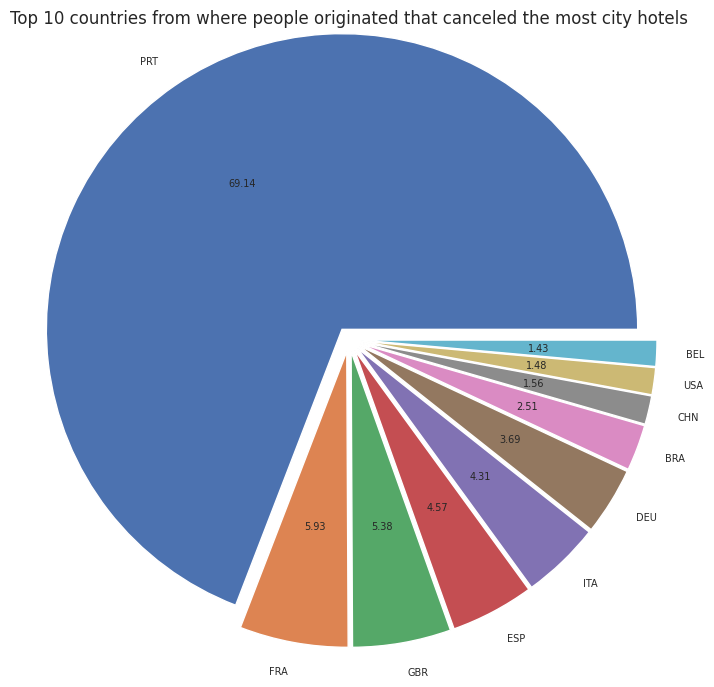

In [ ]:
country_cancelled = city_canceled['country'].value_counts()[:10]
plt.figure(figsize = (8,8))
plt.title('Top 10 countries from where people originated that canceled the most city hotels')
plt.pie(country_cancelled,autopct = '%.2f',labels = country_cancelled.index,
         explode=[0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05],radius=1.2,textprops={'fontsize':7})
plt.show()

In our analysis, we found that the month of May recorded the highest number of city hotel booking cancellations, closely followed by August. Conversely, January exhibited the lowest cancellation rate among the months.

Notably, travelers from Portugal led the list in terms of the highest number of city hotel booking cancellations, reinforcing the observation that Portugal was also a prominent contributor to overall hotel bookings. Portugal is succeeded by visitors from France and Great Britain in the ranking of countries with the most cancellations.
Among the top 10 countries, it's interesting to note that travelers from Belgium had the lowest cancellation rate, underscoring a relatively higher level of commitment to their bookings."

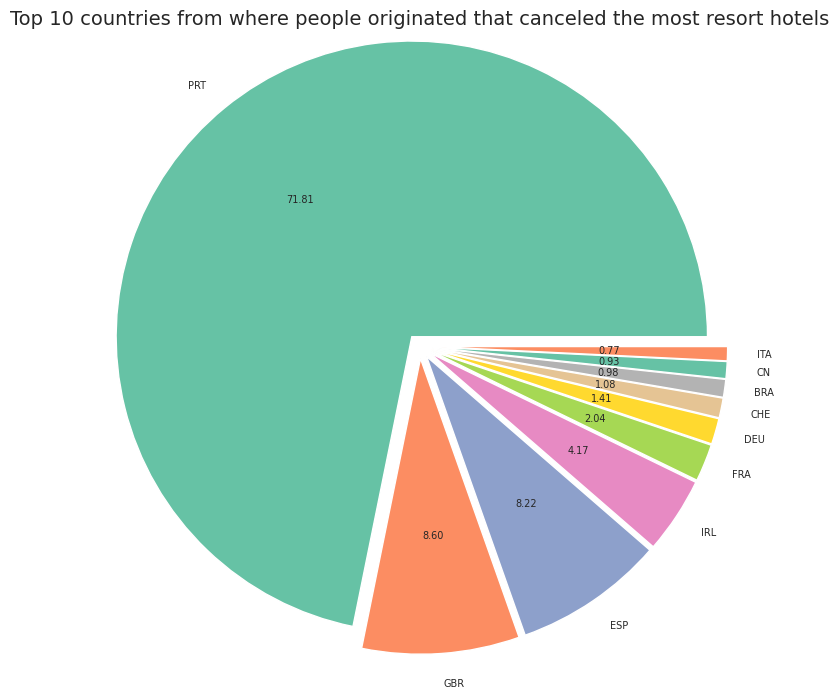

In [ ]:
resort_country_cancelled = resort_cancelled['country'].value_counts()[:10]
plt.figure(figsize = (8,8))
plt.title('Top 10 countries from where people originated that canceled the most resort hotels', fontdict={"fontsize":14},
    pad=10)
plt.pie(resort_country_cancelled,autopct = '%.2f',labels = resort_country_cancelled.index, colors=sns.color_palette('Set2'),
        explode=[0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05],radius=1.2,textprops={'fontsize':7})
plt.show()

The Pie charts suggests that city hotels experience a significantly higher number of cancellations compared to resort hotels. This could be attributed to several factors, including the difference in the nature of these two types of accommodations. City hotels are often chosen for business purposes or shorter stays, which might lead to more last-minute cancellations.

 On the other hand, resort hotels are typically associated with leisure and vacation stays, where travelers may be more committed to their plans. Additionally, the location of city hotels in bustling urban centers might lead to a higher likelihood of cancellations due to changing business or travel plans. Understanding these patterns can help hotels tailor their cancellation policies and marketing strategies to mitigate potential revenue losses.

### **4. Lead Time Analysis**

To answer how can the variability and outliers in lead times, particularly concerning Reservation Status with extended lead times, and what strategies can hotels employ to address this phenomenon and improve guest attendance?

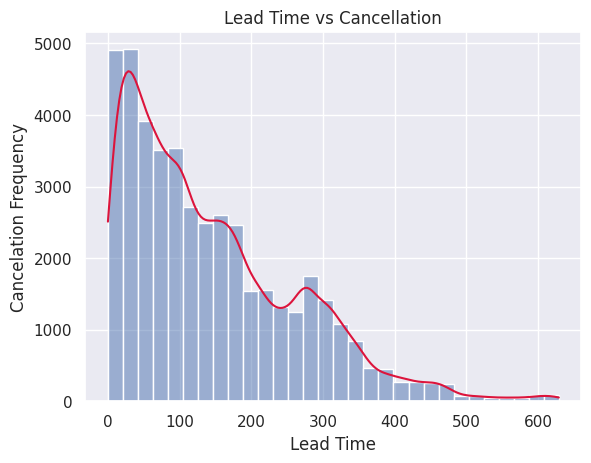

In [ ]:
#leadtime and cancellation
lc=cleaned_bookings[['lead_time','is_canceled']]
lc = lc[lc['is_canceled']==1]
ax= sns.histplot(lc,x='lead_time',bins=30,kde=True)
ax.lines[0].set_color('crimson')
plt.xlabel('Lead Time')
plt.ylabel('Cancelation Frequency')
plt.title('Lead Time vs Cancellation');

Lead time, representing the number of days between booking and arrival, has a significant impact on cancellation frequency. Bookings made closer to the arrival date (with shorter lead times) tend to have a higher likelihood of getting canceled, especially as the arrival date approaches. Conversely, bookings made well in advance (with longer lead times) have a lower cancellation rate. This suggests that customers who book last-minute are more likely to cancel their reservations, whereas those who plan their trips well ahead of time tend to follow through with their bookings. This insight emphasizes the importance of considering lead time when analyzing and managing hotel booking cancellations, providing valuable guidance for hotel management and marketing strategies to optimize their policies and revenue management based on lead time patterns.

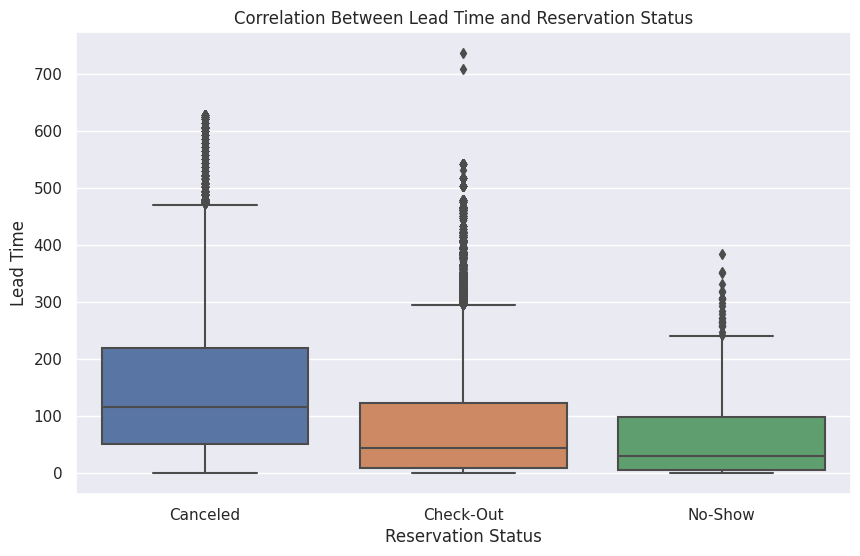

In [ ]:
# Creating a box plot to visualize the correlation
plt.figure(figsize=(10, 6))
sns.boxplot(data=cleaned_bookings, x='reservation_status', y='lead_time')

plt.title('Correlation Between Lead Time and Reservation Status')
plt.xlabel('Reservation Status')
plt.ylabel('Lead Time')
plt.show()

The spread of data in the box plot (interquartile range) can indicate the variability in lead times. A wider spread suggests more variability, while a narrower spread suggests more consistency in lead times for a particular status. Outliers in the box plot can highlight extreme values in lead time. The data is shedding light on customer behavior. "No-Show" reservations with long lead times is suggesting a need to understand why some guests book in advance but do not show up. These insights can help hotel management and decision-makers optimize their operations, marketing strategies, and customer service based on the relationship between lead time and reservation status.

### **5**. **The** **Deposit** **Type** **Dilemma**

We will try to visualize how Deposit type affect Cancellation decisions

Deposits serve a dual purpose in the booking process: they secure reservations for customers while acting as a safeguard against potential losses for hotel owners. Deposit types are a critical factor influencing customer behavior patterns.



In [ ]:
counts = cleaned_bookings.groupby(['deposit_type', 'is_canceled']).size().unstack()

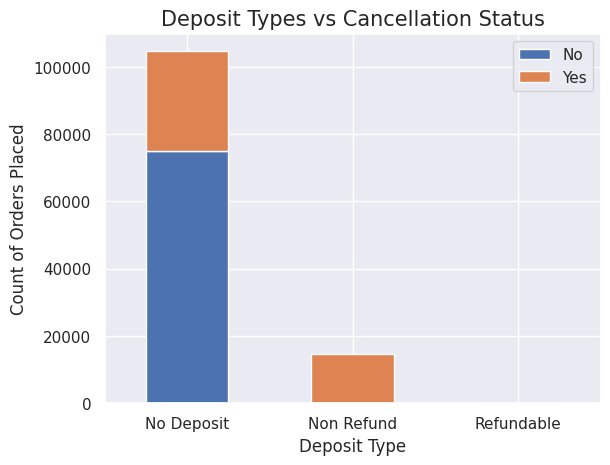

In [ ]:
counts.plot(kind='bar', stacked=True)
plt.title('Deposit Types vs Cancellation Status',fontsize=15)
plt.xlabel('Deposit Type',fontsize=12)
plt.ylabel('Count of Orders Placed',fontsize=12)
plt.xticks(rotation=0)
plt.legend(["No",'Yes']);

In [ ]:
counts['canceled_perc'] = counts[1] / (counts[1] + counts[0]) * 100
counts['keep_perc'] = counts[0] / (counts[1] + counts[0]) * 100
counts

is_canceled,0,1,canceled_perc,keep_perc
deposit_type,,,,
No Deposit,74946,29694,28.377294,71.622706
Non Refund,93,14494,99.362446,0.637554
Refundable,126,36,22.222222,77.777778


We delved deeper into this aspect by analyzing the influence of deposit types on cancellation status. Our goal was to gain insights into how the concept of a sunk cost, as represented by the deposit, affects customers' decision-making. This investigation revealed a complex relationship between deposit policies and booking behavior, offering valuable insights into the psychology behind hotel reservations and cancellations.

A surprising revelation emerged from our analysis. It's commonly believed that when customers commit to non-refundable deposits, their investment becomes a sunk cost, ensuring their loyalty to the hotel. However, the dataset presents a counterintuitive finding: non-refundable deposits exhibit the highest cancellation ratio, while both no-deposit and refundable deposits boast cancellation rates below 30%.

This unexpected anomaly hints at a previously overlooked rule. Non-refundable deposits may not guarantee customer retention but rather have the opposite effect. The fact that customers who've made non-refundable deposits frequently cancel their bookings could potentially signal to others that hotels requesting non-refundable deposits might not offer sufficient value in return. This observation challenges conventional wisdom, emphasizing the intricate psychology behind booking decisions in the hospitality industry.

#  SECTION 2: **FAMILY** **TRAVEL** **BOOKING** **PATTERNS**

In our second storyline, we shift the focus to family travel bookings and analyze their behavior within the dataset. Our key objectives include:
1. **Family Reservation Status Analysis**: Beginning by examining the reservation status for family bookings. This provides an overall understanding of how often family reservations are confirmed, canceled, or result in no-shows. It serves as a foundational analysis.

2. **Month-Wise Family Travel Trends**: Moving on to explore the month-wise family travel trends. This helps identify peak travel months and any seasonal variations in family bookings, providing context for further analysis.

3. **Special Requests for Room Type**: Investigating the preferences of families regarding special room requests. Understanding whether families tend to make specific requests and how often these requests are fulfilled, shedding light on their room-type preferences.

4. **Meal Booking Patterns with Respect to Family**: Concluding the analysis by exploring meal booking patterns for families. This involves understanding the frequency of meal plan selection, popular meal options among families, and variations in meal choices based on the family's country of origin.


### **1**. **Family** **Reservation** **Status** **Analysis**

Continuing our visualization and rationale for the cancellation subset, we a now observe a trend for the family reservation that draws a comaprison for the cancelled, check-out and no-show status for further observation with respect to the family behaviour and cancellations.

In [ ]:
# For the analysis for family bookings we subset the dataset to see factors affecting family booking behaviours
family = cleaned_bookings[(cleaned_bookings.children != 0) | (cleaned_bookings.babies !=0)]
family["kids"]=family.children + family.babies # new column for total number of kids
family.kids[family.kids==0] # sanity check
family["family_size"] = family.kids + family.adults #new column to find the total number of members in the family
family = family[family.family_size!=1] # new dataset for family booking analysis is ready
family

<ipython-input-139-40e38f2e775c>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-139-40e38f2e775c>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,reservation_year,kids,family_size
13,Resort Hotel,0,18,2015,Jul,27,1,0,4,2,...,Transient,154.77,0,1,Check-Out,2015-07-05,2015-07-01,2015,1,3
45,Resort Hotel,1,47,2015,Jul,27,2,2,5,2,...,Transient,153.00,0,0,Canceled,2015-06-02,2015-07-02,2015,2,4
55,Resort Hotel,0,1,2015,Jul,27,2,0,1,2,...,Transient,107.00,1,2,Check-Out,2015-07-03,2015-07-02,2015,2,4
65,Resort Hotel,0,10,2015,Jul,27,3,0,2,2,...,Transient,153.00,1,0,Check-Out,2015-07-05,2015-07-03,2015,2,4
87,Resort Hotel,1,79,2015,Jul,27,3,6,15,2,...,Transient,108.73,0,2,Canceled,2015-04-15,2015-07-03,2015,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119270,City Hotel,0,0,2017,Aug,35,29,0,3,2,...,Transient,135.00,0,2,Check-Out,2017-09-01,2017-08-29,2017,1,3
119287,City Hotel,0,167,2017,Aug,35,27,2,4,2,...,Transient,177.75,0,0,Check-Out,2017-09-02,2017-08-27,2017,1,3
119293,City Hotel,0,243,2017,Aug,35,30,0,3,2,...,Transient,189.00,0,3,Check-Out,2017-09-02,2017-08-30,2017,2,4
119318,City Hotel,0,160,2017,Aug,35,29,0,5,2,...,Transient,153.90,0,0,Check-Out,2017-09-03,2017-08-29,2017,1,3


In [ ]:
pieplotfam = family.groupby('reservation_status').agg({'family_size':'count'}).reset_index()

In [ ]:
fig = px.pie(pieplotfam, values='family_size', names='reservation_status',
             title='Family Distribution on the Basis of Booking Status',
             color_discrete_sequence=px.colors.sequential.Teal)

# Update layout
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(showlegend=False)

# Show the plot
fig.show()

The analysis of family reservations reveals that 65.1% of families successfully checked out of the hotel, while 33.9% of family bookings were canceled. This data suggests that families generally tend to complete their hotel stays, possibly due to structured travel plans. However, the relatively high cancellation rate warrants further investigation to understand the underlying reasons. Factors such as sudden changes in family plans or hotel dissatisfaction may contribute to these cancellations. To better serve family travelers, hotels could consider flexible cancellation policies to accommodate their needs and enhance overall satisfaction.

This analysis highlights the significance of tailoring services to meet the unique requirements of family guests and minimize booking cancellations.

### **2. Month-Wise Family Travel Trends**

As we explore the months when families travel together and their associated travel trends, can we establish a connection between these travel patterns and the special requests families make during their stays.

In [ ]:
#month wise family travel analysis

parent_with_children_monthly = family.groupby('arrival_date_month')['family_size'].count().reset_index()
parent_with_children_monthly

,arrival_date_month,family_size
0,Jan,343
1,Feb,607
2,Mar,535
3,Apr,818
4,May,621
5,Jun,777
6,Jul,1702
7,Aug,2097
8,Sep,464
9,Oct,534


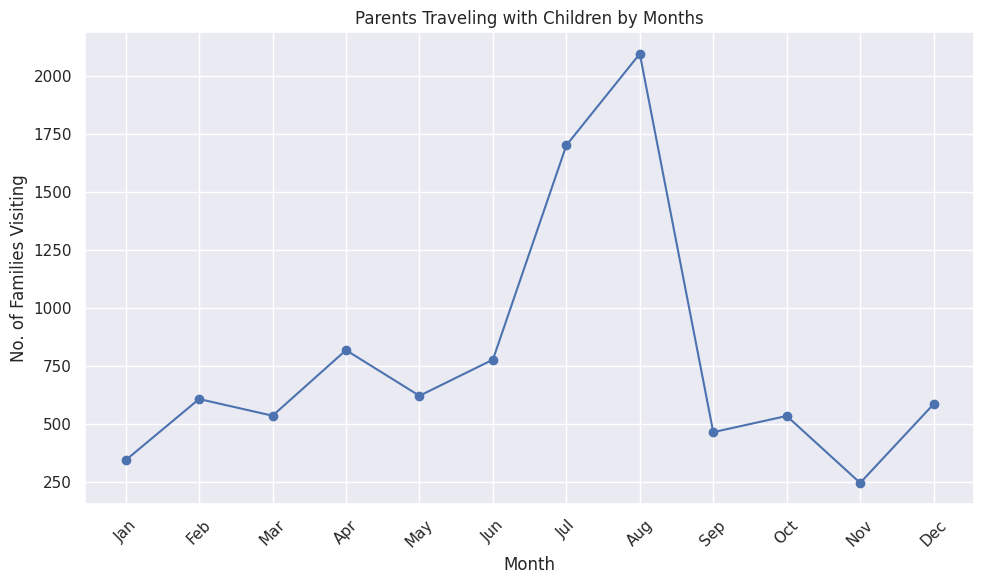

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(parent_with_children_monthly['arrival_date_month'], parent_with_children_monthly['family_size'], marker='o', linestyle='-', color='b')
#sns.barplot(x=parent_with_children_monthly['arrival_date_month'], y =parent_with_children_monthly['parents_with_children'])
plt.title('Parents Traveling with Children by Months')
plt.xlabel('Month')
plt.ylabel('No. of Families Visiting')
plt.grid(True)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The line plot analysis reveals valuable insights into the booking preferences of families. It indicates that August is the most favored month for family hotel bookings, while November is the least preferred. This information is pivotal for hotels and resorts looking to enhance their marketing strategies. By concentrating promotional efforts on the peak family travel months, such as August, and tailoring offerings to suit family needs, they can attract more family guests. These insights underscore the importance of aligning business strategies with seasonal booking trends to optimize occupancy rates and cater to the specific demands of family travelers.

### **3. Family Booking Preference on Hotel Type**

 Utilized a pairplot to analyze family bookings. This visualization allows us to identify correlations and patterns between various attributes, offering insights into booking behavior and tendencies within family travel.

In [ ]:
family.family_size.unique()

array([ 3,  4,  5, 12,  2, 10])

In [ ]:
# grouped on the basis of family size to get customer behaviour depending on the number of members
pfam = family.groupby(['hotel','family_size']).agg({'reservation_status':'count','total_of_special_requests':'mean',
                                                    'stays_in_weekend_nights':'mean','stays_in_week_nights':'mean',
                                                    'meal':stats.mode, 'market_segment':stats.mode}).reset_index()
pfam.rename(columns={'reservation_status':'No. of families visiting'},inplace=True)
pfam

,hotel,family_size,No. of families visiting,total_of_special_requests,stays_in_weekend_nights,stays_in_week_nights,meal,market_segment
0,City Hotel,2,409,0.887531,1.058680,2.523227,BB,Online TA
1,City Hotel,3,3067,1.131725,0.950440,2.415064,BB,Online TA
2,City Hotel,4,1829,0.771460,0.891744,2.369054,BB,Online TA
3,City Hotel,5,92,0.913043,0.804348,2.108696,BB,Online TA
4,City Hotel,10,1,0.000000,2.000000,1.000000,BB,Corporate
5,City Hotel,12,1,1.000000,0.000000,2.000000,BB,Online TA
6,Resort Hotel,2,82,0.792683,1.439024,3.256098,BB,Online TA
7,Resort Hotel,3,1762,1.160045,1.363224,3.519296,BB,Online TA
8,Resort Hotel,4,2041,0.581088,1.317001,3.332190,BB,Online TA
9,Resort Hotel,5,43,0.651163,1.139535,3.139535,BB,Direct


The above table shows the mean for requests made, nights stayed and mode for the meal plan opted for, based on the family size visiting different hotels - city and resort. Overall everyone took the Breakfast plan irrespective of the number of members.

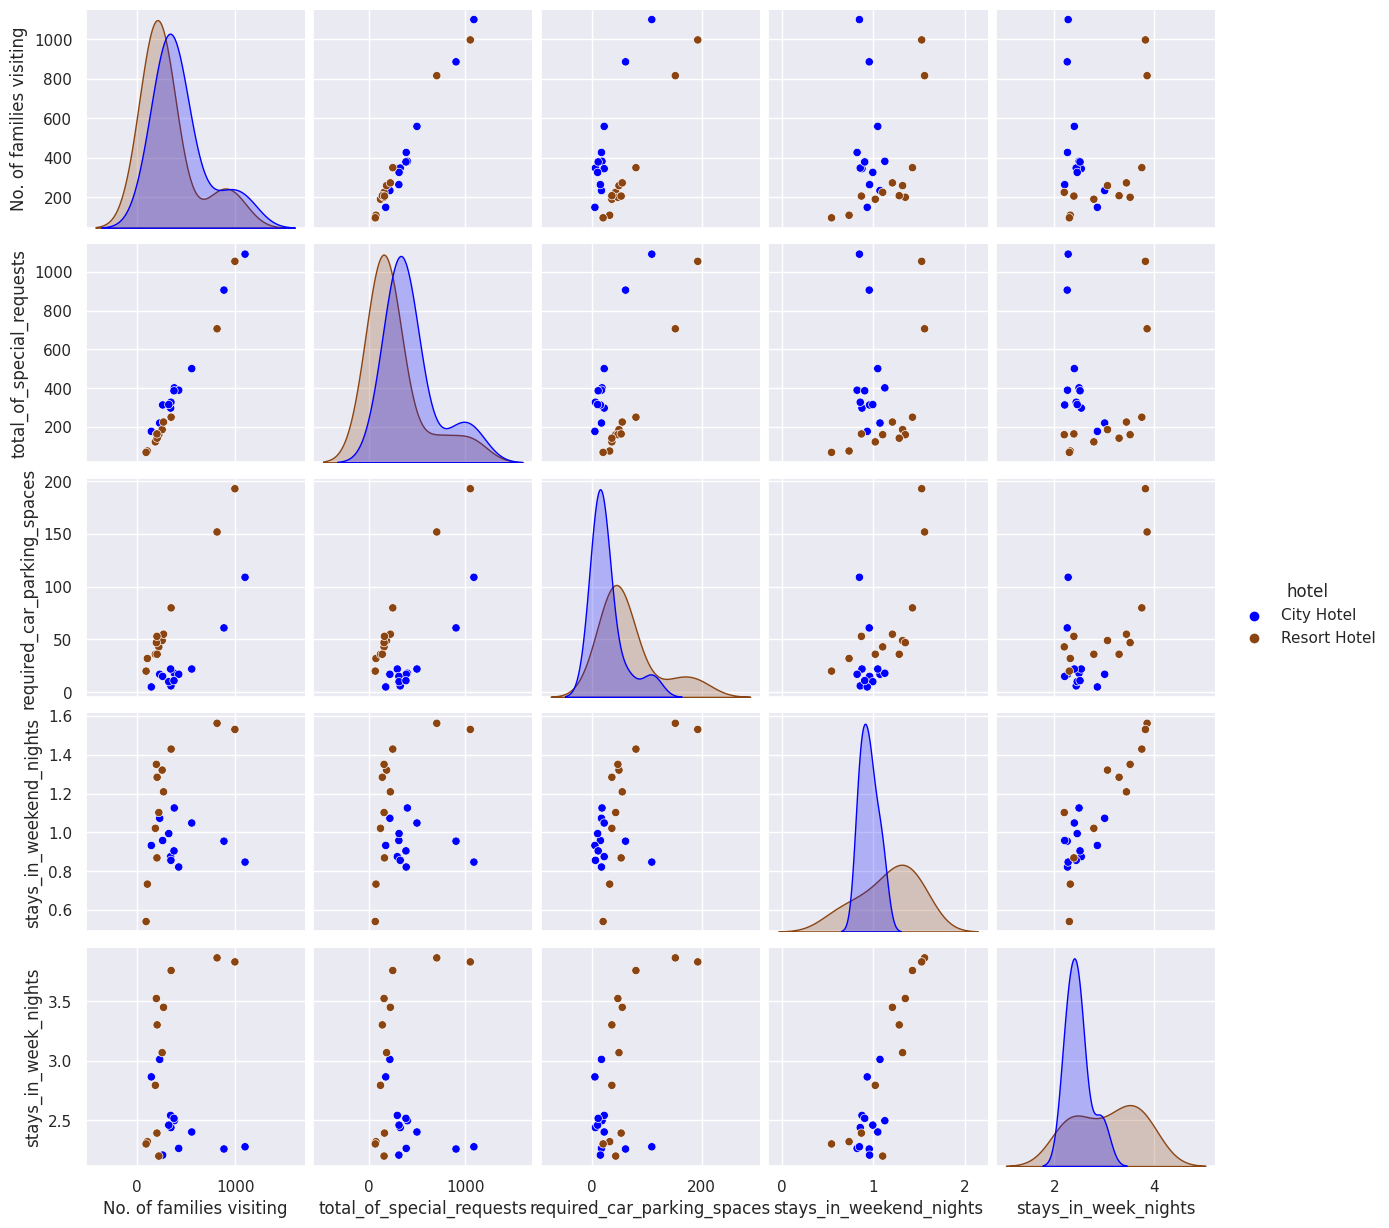

In [ ]:
# grouped for getting the number of famlies visitng in particular months
pairfam = family.groupby(['hotel','arrival_date_month']).agg({'family_size':'count','total_of_special_requests':'sum',
                                                              'required_car_parking_spaces':'sum','stays_in_weekend_nights':'mean',
                                                              'stays_in_week_nights':'mean'}).reset_index()
pairfam.rename(columns={'family_size':'No. of families visiting'},inplace=True)
sns.pairplot(pairfam, hue='hotel', height=2.5,palette=['#0000FF','saddlebrown']);

The pair plot analysis of family booking trends yields several valuable insights. It allowed us to assess correlations between variables, understand data distributions, recognize booking patterns and special requests on family reservations.

We can clearly see that the special requests made are increasing with the number of family visits and only when the stay nights are for a longer duration.

We can observe that family plans have no clear prefernce for city or resort hotel types but,a general preference for city hotels can be seen when the trip is for a shorter duration as opposed to resort stays.

Hotels and resorts can leverage these findings to optimize their marketing and services, tailoring their offerings to align with family preferences and enhance the overall experience.

### **4. Special Requests Made by Families**

Now, to visualize and find out how do special room requests made by guests vary throughout the year we plot the following graph.

In [ ]:
overall_request = cleaned_bookings.groupby("arrival_date_month")["total_of_special_requests"].sum()
overall_request

arrival_date_month
Jan     3246
Feb     4241
Mar     4872
Apr     5783
May     6280
Jun     6169
Jul     8505
Aug    10223
Sep     5268
Oct     5516
Nov     3949
Dec     4163
Name: total_of_special_requests, dtype: int64

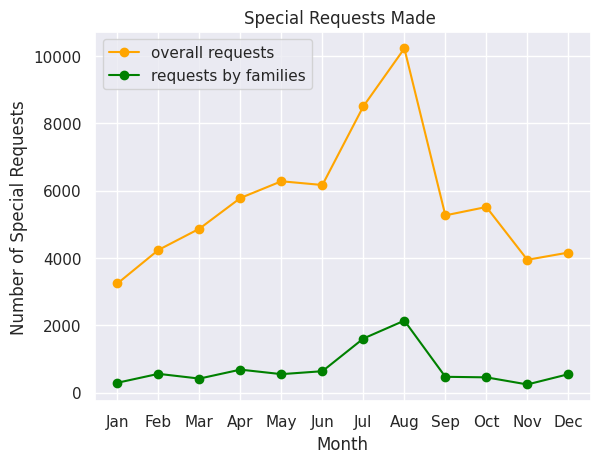

In [ ]:
family_request = family.groupby("arrival_date_month")["total_of_special_requests"].sum()
plt.plot(overall_request,color='orange',marker='o',label="overall requests")
plt.plot(family_request,color='green',marker='o',label='requests by families')
plt.legend()
plt.xlabel('Month')
plt.ylabel('Number of Special Requests')
plt.title('Special Requests Made ')
plt.show();

The analysis reveals a significant positive correlation between the number of requests made by guests traveling with their families and the overall monthly request volume. This suggests that family travelers play a substantial role in driving the demand for services and accommodations throughout the year, indicating their importance as a customer segment that hotels and resorts should actively cater to and prioritize in their offerings.

### **5. Meal Booking Patterns with Respect to Family**

A meal is always an exciting part of a hotel stay. To explore the meal preferences of families when booking accommodations, we turn to visualization to identify the meal types that families most frequently opt for during their hotel stays.

In [ ]:
df = cleaned_bookings[['meal','adults','children']]
df

,meal,adults,children
0,BB,2,0
1,BB,2,0
2,BB,1,0
3,BB,1,0
4,BB,2,0
...,...,...,...
119385,BB,2,0
119386,BB,3,0
119387,BB,2,0
119388,BB,2,0


In [ ]:
family_with_child=df[df.children!=0]

In [ ]:
family_with_child["family_size"]=family_with_child.adults + family_with_child.children
family_two = family_with_child.groupby(['meal','family_size']).agg({"family_size":"count"})
family_two.reset_index('meal',inplace=True)
family_two

<ipython-input-151-6e94ef845372>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,meal,family_size
family_size,,
1,BB,4
2,BB,404
3,BB,3437
4,BB,3147
5,BB,86
12,BB,1
1,FB,0
2,FB,3
3,FB,49


Text(0, 0.5, 'Family Counts')

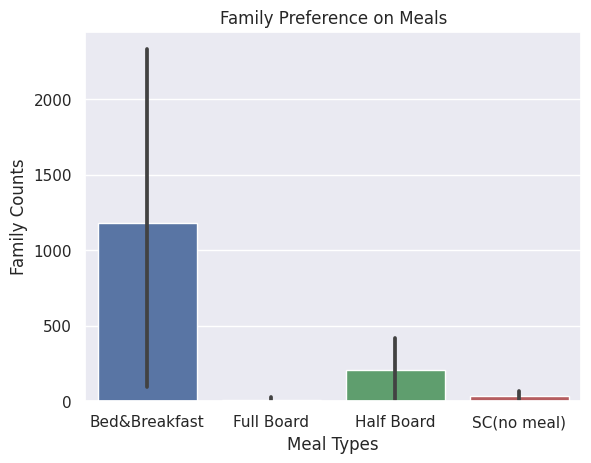

In [ ]:
sns.set()
figsize=(12,6)

sns.barplot(x=family_two['meal'], y=family_two['family_size'], data=family_two);
plt.xticks([0,1,2,3],['Bed&Breakfast', 'Full Board', 'Half Board', 'SC(no meal)']);
plt.title('Family Preference on Meals')
plt.xlabel('Meal Types')
plt.ylabel('Family Counts')

The bar plots unveil intriguing insights into meal preferences within the family travel segment. Among the available meal packages, Bed & Breakfast (BB) and Half board (HB) options significantly dominate, suggesting that families tend to favor these inclusive meal packages during their hotel stays.

 In contrast, Full board (FB) and the absence of any meal package (SC) seem to be less popular among family travelers, possibly indicating a preference for flexibility or cost-conscious choices.

# **Conclusion:**

In this comprehensive EDA (Exploratory Data Analysis) of hotel bookings in Portugal, we embarked on a multifaceted journey to understand the factors influencing cancellations and unearth family travel booking patterns. Our analysis encompassed data cleaning, transformation, and visualization. We started by exploring customer behaviour patterns, tracking monthly trends, and scrutinizing the countries that sent the most tourists, each correlated with various tourist types. Unveiling the motivation behind this analysis, we aimed to decipher the dynamic hospitality industry, providing insights for budget-conscious travellers and fostering real-world marketing analytics. We identified the months of May and August as critical periods for cancellations in city hotels, with a notable influence of distribution channels. Surprisingly, non-refundable deposits displayed the highest cancellation rate, challenging conventional wisdom. We also discovered that deposit type significantly affects cancellation decisions, adding depth to our understanding of customer behaviour. The family travel booking analysis revealed preferences for August and November, invaluable information for hotels aiming to cater to families during peak months. Pair plots illustrated how family bookings correlate with various factors, shedding light on booking trends. Special room requests made by families exhibited a positive correlation with the overall volume of requests, underlining the impact of family travellers on demand for hotel services. Furthermore, we analysed meal preferences among family travellers, with Bed & Breakfast (BB) and Half board (HB) options emerging as favourites, aligning with cost-conscious or flexible choices.
In conclusion, this EDA provides a rich tapestry of insights into the trends, preferences, and behaviours that shape the hotel booking landscape in Portugal. By dissecting cancellations and family travel patterns, we equip hotels and marketers with data-driven strategies to optimize their offerings and better serve diverse customer segments, all while enriching our understanding of the dynamic hospitality industry.

# **Challenges**:

While working with the dataset, we encountered several notable challenges that spanned data quality, analysis complexity, and more. These hurdles influenced our approach to data exploration and analysis in the following ways:
One of the foremost challenges was related to data quality. The dataset exhibited issues such as missing, inaccurate, and incomplete data. These issues presented obstacles to conducting precise analysis and modeling. An additional challenge was the customer type column, which was not clearly identified in the dataset, hindering its use in further analysis. The sheer volume of data in the dataset posed computational challenges. Handling and processing extensive data can be computationally intensive. To alleviate this, we opted to focus on specific subsets of data for particular analyses rather than attempting to process the entire dataset in every instance. <br>
A considerable amount of effort and time was invested in cleaning and preprocessing the data. This process encompassed addressing missing values, identifying and handling outliers, and ensuring overall data consistency.
Dealing with cancellations in the dataset presented unique challenges. We aimed to understand the reasons for cancellations and assess their impact on both revenue and occupancy. This analysis was vital for effective decision-making.
It was difficult to understand and dissecting customer behavior and preferences was an essential aspect of our analysis. This understanding played a critical role in optimizing revenue and occupancy rates, ensuring we meet customer needs effectively. The dataset had certain limitations, primarily the absence of key financial data such as pricing, promotions, and operational costs. This limitation made it challenging to perform comprehensive revenue analysis based on pricing strategies and cost considerations.
Each of these challenges influenced our approach, data selection, and the depth of analysis conducted throughout our exploration of the dataset. Despite these hurdles, the analysis yielded valuable insights into the hotel booking landscape.

# **Citation:**

https://matplotlib.org/stable/users/explain/colors/colormaps.html
<br>
https://pythonhow.com/how/limit-floats-to-two-decimal-points/#:~:text=To%20limit%20a%20float%20to,resulting%20in%20the%20value%203.14.
<br>
https://seaborn.pydata.org/generated/seaborn.heatmap.html
https://stackoverflow.com/questions/7082345/how-to-set-the-labels-size-on-a-pie-chart <br>
https://stackoverflow.com/questions/14098895/math-i-need-to-normalize-some-bar-graphs <br>
https://stackoverflow.com/questions/66863762/how-can-i-change-the-values-on-the-x-axis-of-my-bar-plot <br>
https://www.pythoncharts.com/matplotlib/stacked-bar-charts-labels/